In [27]:
import pandas as pd

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
import joblib
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
#df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

In [30]:
#new_col = pd.read_csv('gender_submission.csv')
#df_test['Survived'] = new_col['Survived']

In [31]:
#df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
#df

In [32]:
df = pd.read_csv('unified_genotypes_preprocessed_final_v2 - unified_genotypes_preprocessed_final_v2.csv')

In [33]:
# Separar características (X) y etiquetas (y)
X = df.drop(columns=['group', 'patient_id', 'risk'])
y = df['group']

In [34]:
#df['Age'] = df['Age'].fillna(df['Age'].mean())
#df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

#df = pd.get_dummies(df, 'sex')
#df


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
steps1= [
    ('scaler', StandardScaler()), # feature scaling
    ('pca', PCA(0.95)), # dimensionality reduction
    ('svm', SVC())
]

pipeline = Pipeline(steps1)

In [37]:
# Model tuning

not_tuned = not os.path.exists('model.pkl')
wants_to_tune = False if not_tuned else input('Do you want to tune the model? (y/n) ').lower() == 'y'

if not_tuned or wants_to_tune:
    parameters = {
        'svm__kernel': ['linear', 'rbf', 'sigmoid'],
        'svm__C': [0.1, 1, 10, 100],
        'svm__gamma': [1, 0.1, 0.01, 0.001]
    }

    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)
    grid = grid.fit(X_train, y_train)
    pipeline = grid.best_estimator_

    print('score = %3.2f' %(grid.score(X_test, y_test)))
    print(grid.best_params_)

    joblib.dump(pipeline, 'model.pkl')
else:
    pipeline = joblib.load('model.pkl')

KeyboardInterrupt: Interrupted by user

In [ ]:
y_pred = pipeline.predict(X_test)

Accuracy: 65.96%
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        31
           1       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47



C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

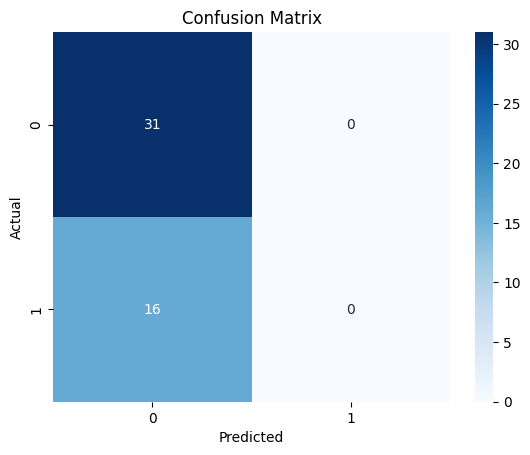

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)*100

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('Accuracy: %3.2f%%' %(acc))
print(classification_report(y_test, y_pred))